Iter : 0   Erreur : 0.20123465551744543
Iter : 10   Erreur : 0.26347894155313734
Iter : 20   Erreur : 0.2752762708511162
Iter : 30   Erreur : 0.28033286209429514
Iter : 40   Erreur : 0.27813213072383913
Iter : 50   Erreur : 0.28010217332936393
Iter : 60   Erreur : 0.2898840429051484


/Users/jordanbonil/Desktop/deep_learning_2/group_project/principal_RBM_alpha.py:17: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))


Iter : 70   Erreur : 0.2962147319707115
Iter : 80   Erreur : 0.2796940943443621
Iter : 90   Erreur : 0.286065889240172
Iter : 0   Erreur : 0.035008988388383094
Iter : 10   Erreur : 0.03846153845276426
Iter : 20   Erreur : 0.038461538461538464
Iter : 30   Erreur : 0.038461538461538464
Iter : 40   Erreur : 0.038461538461538464
Iter : 50   Erreur : 0.038461538461538464
Iter : 60   Erreur : 0.038461538461538464
Iter : 70   Erreur : 0.038461538461538464
Iter : 80   Erreur : 0.038461538461538464
Iter : 90   Erreur : 0.038461538461538464


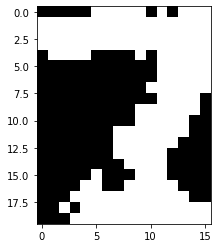

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
import principal_RBM_alpha as rbm
import principal_DBN_alpha as dbn
import idx2numpy
from sklearn.preprocessing import OneHotEncoder

##############################
######### AlphaDigit #########
##############################
p, q = 320, 50
nb_iter = 100
alpha = 0.1
batch_size = 10
n = 72
nb_iter_gibbs = 1000
nb_couche = 2


#Cahrge les données
X = rbm.lire_alpha_digit([2, 7]) #(72, 320)

"""
#RBM
#initialisation
RBM = rbm.RBM(p, q)
#train
rbm.train_RBM(RBM, X, nb_iter, batch_size, alpha)
#Test
rbm.generer_image_RBM(RBM, nb_iter_gibbs, 1)
"""


#DBM
DBN = dbn.DNN(nb_couche, p, q)
dbn.pretrain_DNN(DBN, X, nb_iter, batch_size, alpha)
dbn.generer_image_DBN(DBN, nb_iter_gibbs, 1)





##############################
############ MNIST ###########
##############################


file = 'train-images.idx3-ubyte'
X = (idx2numpy.convert_from_file(file).reshape((60000,-1,1))[:,:,0]>127)*1.
X = X[:1000, :]
file = 'train-labels.idx1-ubyte'
Y = idx2numpy.convert_from_file(file)
Y = Y[:1000].reshape((-1, 1))
Y = OneHotEncoder().fit_transform(Y)

image_size = 28
num_images = 5



In [3]:
Y.shape


(1000, 10)

In [ ]:
#DNN is a DBN with a classification layer
n_layers = 3

DNN = dbn.DNN(n_layers, input_dim, n_classes)
# n_classes needs to be Y.shape[-1]
n_classes = Y.shape[-1]
DNN.add_classification_layer(n_classes)

import principal_DNN_MNIST as dnn
learning_rate = 3e-4
DNN = dnn.retropropagation(DNN, X, nb_iter, learning_rate, batch_size, X.shape[0], Y )

dnn.test_DNN(DNN, X, Y)